In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv('emails.csv')


In [3]:
df.sample(10)

,text,spam
5493,Subject: re : ed krapels just thought you ' d...,0
2853,Subject: re : fas 133 offsite zimin lu will a...,0
4078,"Subject: re : a friend of mine vince , thank...",0
297,Subject: amaze your partner with the talents i...,1
5434,Subject: resume and available dates for amy wa...,0
2764,Subject: request submitted : access request fo...,0
2231,"Subject: re : trading algorithms andy , soun...",0
653,Subject: are you ready to get it ? hello ! v...,1
1416,"Subject: azuix deal valuation bob , please f...",0
5588,Subject: short term private firm model : stati...,0


In [4]:
print(df)


                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]


### replaces all `NaN` values in the DataFrame with empty strings while keeping non-null values intact.

In [5]:
data = df.where(pd.notnull(df), '')

### Displaying Summary Information of a DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


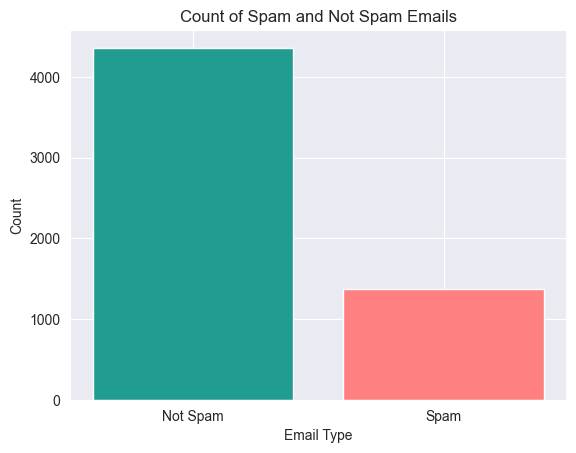

In [7]:
spam_labels = df['spam'].replace({0: 'Not Spam', 1: 'Spam'})
spam_counts = spam_labels.value_counts()
colors = ['#219C90', '#FF8080']

plt.bar(spam_counts.index, spam_counts.values, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Count of Spam and Not Spam Emails')
plt.show()

In [8]:
X = data['text']
Y = data['spam']

In [9]:
print(X)

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object


In [10]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64


### Data Preprocessing and Model Training

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [12]:
print(X.shape)

(5728,)


In [13]:
# Create a TfidfVectorizer to convert text data into numerical features
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Fit the vectorizer to the training data and transform it into feature vectors
X_train_features = feature_extraction.fit_transform(X_train)

# Transform the test data into feature vectors using the same fitted vectorizer
X_test_features = feature_extraction.transform(X_test)

# Convert the target labels (Y_train and Y_test) to integers for classification
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [14]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [15]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print(f'Accuracy on training data: {accuracy_on_training_data}')

Accuracy on training data: 0.9965080750763858


In [16]:
prediction_on_testing_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_testing_data)
print(f'Accuracy on testing data: {accuracy_on_test_data}')

Accuracy on testing data: 0.9825479930191972


In [19]:
#input_test = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
input_test = ["This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."]
input_data_features = feature_extraction.transform(input_test)
prediction = model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
  print('spam mail')

else:
  print('not spam')

[1]
spam mail


In [20]:
joblib.dump(model, 'email_model.pkl')


['email_model.pkl']

In [21]:
joblib.dump(feature_extraction, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']